In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from osgeo import gdal
import skimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.filters import threshold_otsu
from sklearn import cluster
import scipy
import seaborn as sns
import pandas as pd

In [ ]:
reg_1 = gdal.Open('/content/drive/MyDrive/GEOG371HW8/sar_20211109_vh_region1.tif')

In [ ]:
reg_1 = gdal.Open('/content/drive/MyDrive/GEOG371 Final Project/sar_20211109_vh_region1.tif')

In [ ]:
print(reg_1.GetGeoTransform())
print(reg_1.GetProjectionRef())

(351951.54698421515, 10.0, 0.0, 3486161.810604911, 0.0, -10.0)
PROJCS["WGS 84 / UTM zone 51N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32651"]]


In [ ]:
reg_1_arr = reg_1.ReadAsArray()
reg_1_arr_orig = reg_1_arr.copy()
reg_1_arr = skimage.restoration.denoise_tv_bregman(reg_1_arr, weight=.2, max_num_iter=10000)

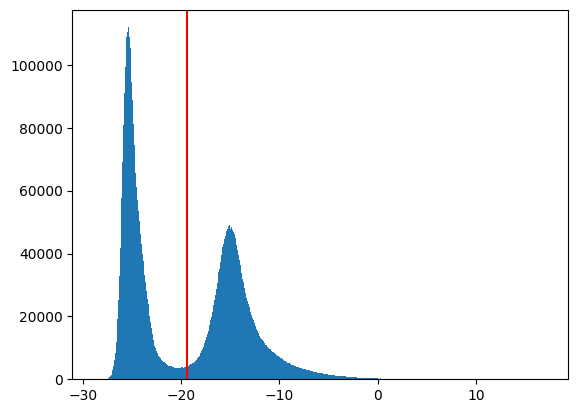

In [ ]:
thresh = threshold_otsu(reg_1_arr)

plt.hist(reg_1_arr.flatten(), bins=1000)
plt.axvline(thresh, color='r')

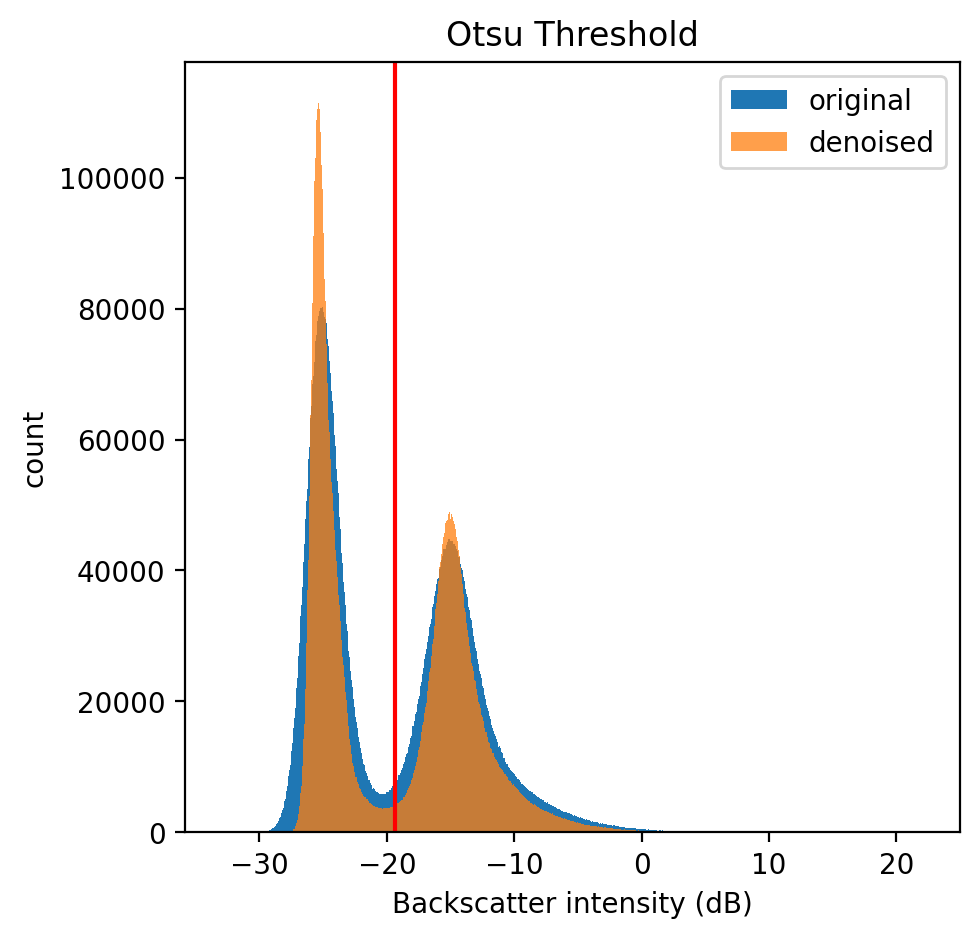

In [ ]:
thresh = threshold_otsu(reg_1_arr)
fig, axs = plt.subplots(figsize=(5, 5), dpi=200)
axs.hist(reg_1_arr_orig.flatten(), bins=1000, label='original')
axs.set_ylabel('count')
axs.set_xlabel('Backscatter intensity (dB)')
axs.set_title('Otsu Threshold')
axs.axvline(thresh, color='r')
dump = axs.hist(reg_1_arr.flatten(), bins=1000, alpha=0.75, label='denoised')
axs.legend()

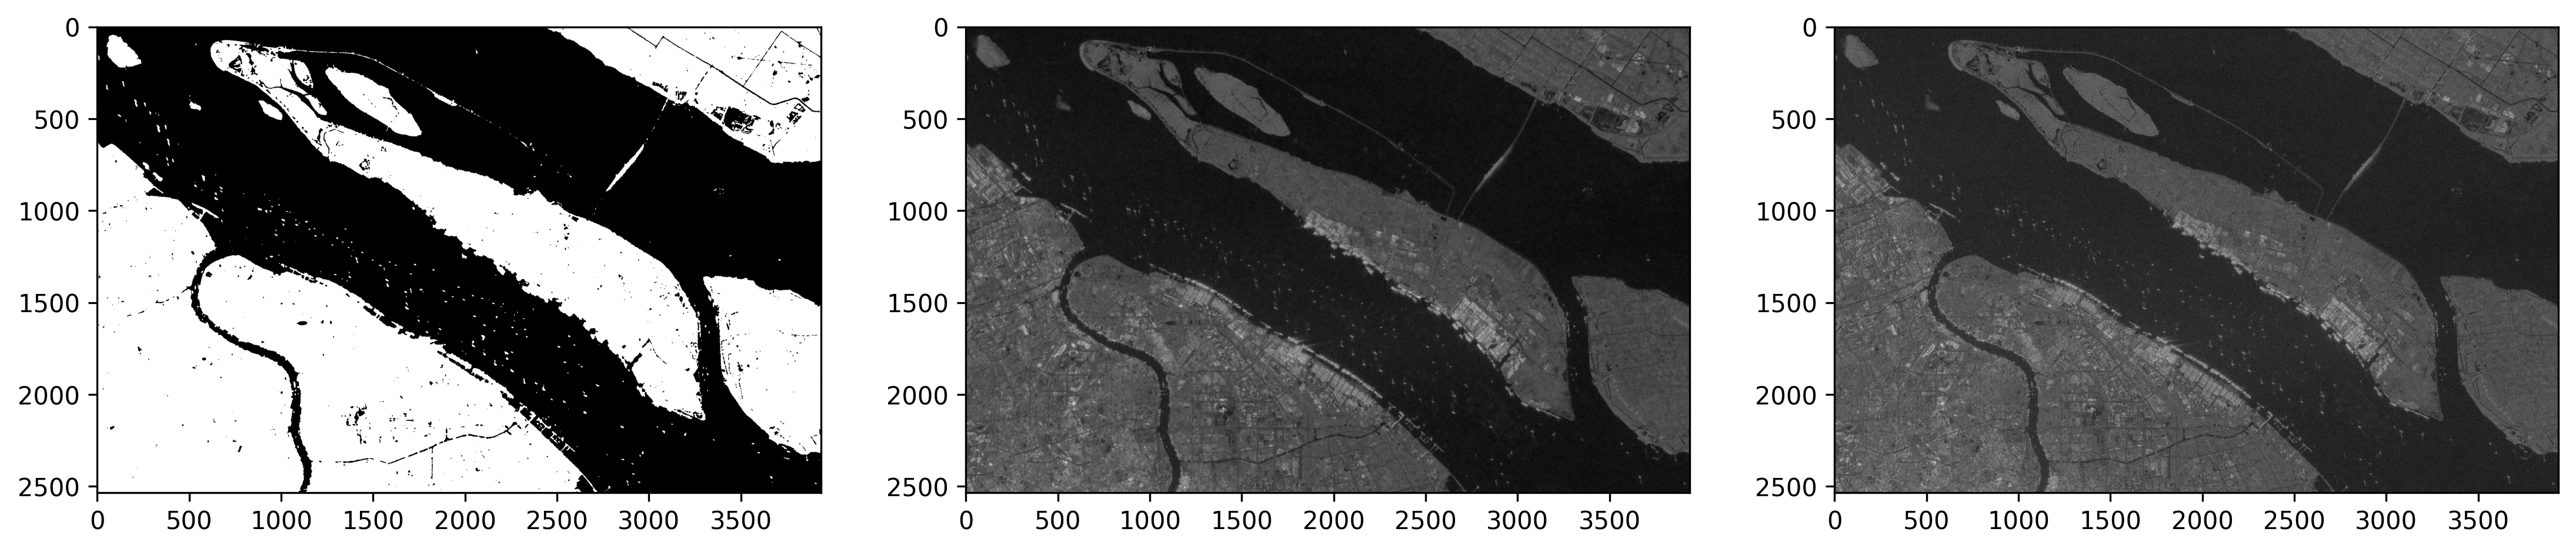

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 12), dpi=300)
axs[0].imshow(reg_1_arr > thresh, cmap='gray')
axs[1].imshow(reg_1_arr, cmap='gray')
axs[2].imshow(reg_1_arr_orig, cmap='gray')

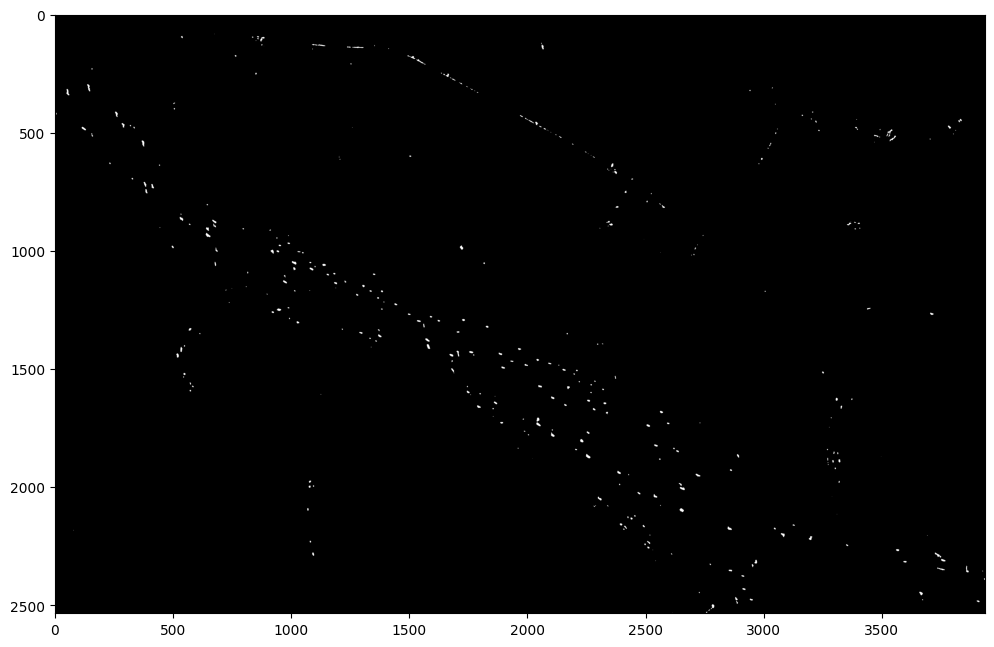

In [ ]:
binary_r1 = reg_1_arr > thresh
small_reg_rem = skimage.morphology.remove_small_objects(binary_r1, min_size=200, connectivity=2)

large_reg_rem = np.where(small_reg_rem == 1, 0, binary_r1)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(large_reg_rem, cmap='gray')

small_reg_labels = skimage.measure.label(large_reg_rem)

In [ ]:
#Unnecessary, small object removal is effectively achieved by perimeter area ratio filtering

# small_reg_rem_2 = skimage.morphology.remove_small_objects(small_reg_labels, min_size=5, connectivity=2)
# small_reg_rem_2 = np.where(small_reg_rem_2 != 0, 1, 0)

# fig, ax = plt.subplots(figsize=(12,12))
# ax.imshow(small_reg_rem_2, cmap='gray')

# small_reg_labels = skimage.measure.label(small_reg_rem_2)

(0.0, 400.0)

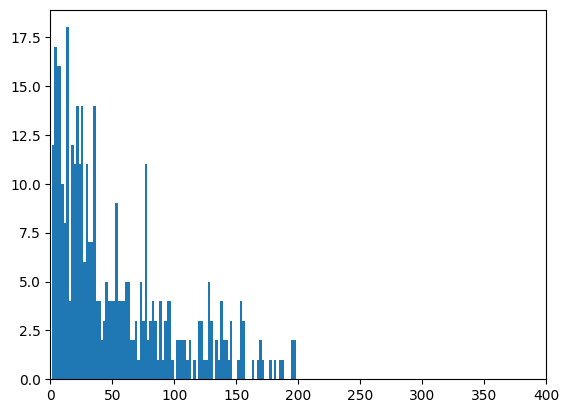

In [ ]:
r1_areas = skimage.measure.regionprops(small_reg_labels)

r_1_area_list = [x.area for x in r1_areas]

plt.hist(r_1_area_list, bins=100)
plt.xlim(0,400)

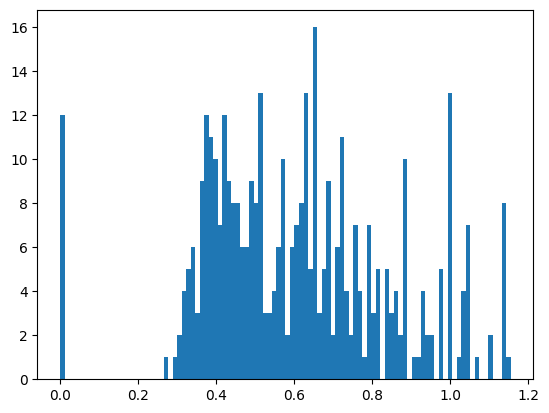

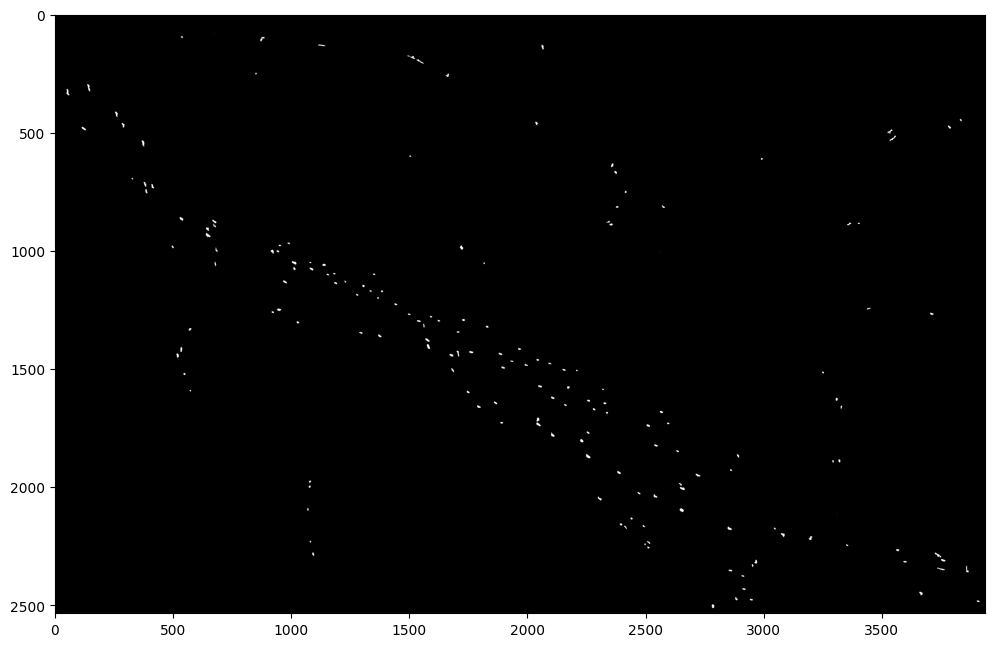

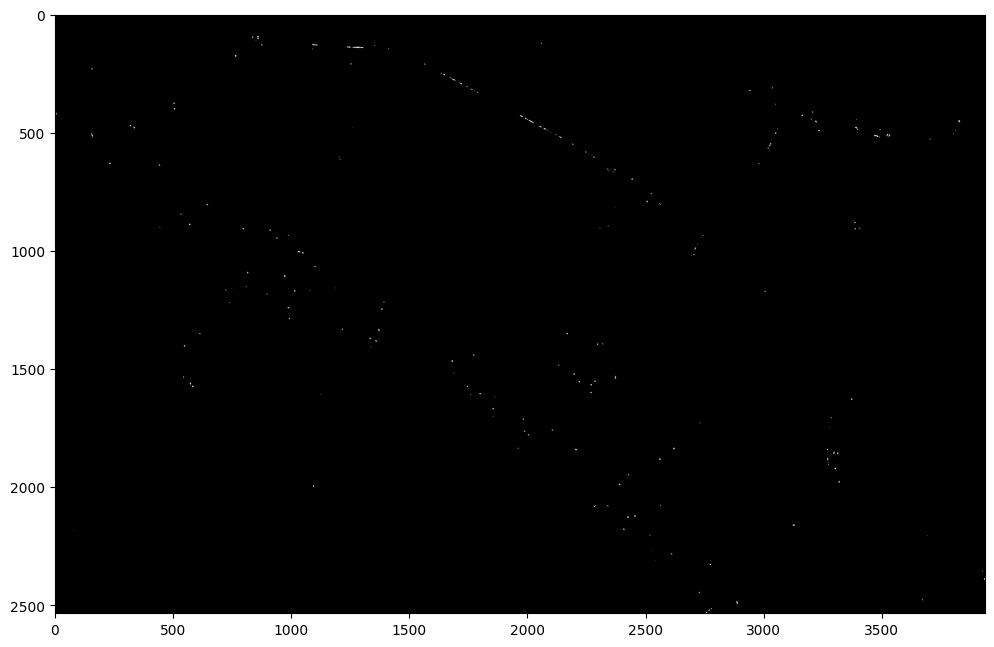

In [ ]:
# Creates an array of perimter-area ratios from the areas array
r1_ratio_list = [(x.perimeter / x.area) for x in r1_areas]
# Plots ratios as a histogram
plt.hist(r1_ratio_list, bins=100)

# Creates empty arrays to capture the fltered and removed objects
filtered = np.full_like(small_reg_labels, 0)
removed = np.full_like(small_reg_labels, 0)

# For each object in the areas array, add it to the filtered array if it fits the ratio criteria
# Else, add it to the removed array
for area in r1_areas:
    ratio = area.perimeter / area.area
    if ratio < 0.57:
      filtered[tuple(area.coords.T)] = 1
    else:
      removed[tuple(area.coords.T)] = 1

# Visualizes the filtered and removed masks
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(filtered, cmap='gray')

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(removed, cmap='gray')

In [ ]:
filtered_labels = skimage.measure.label(filtered)
filtered_regions = skimage.measure.regionprops(filtered_labels)

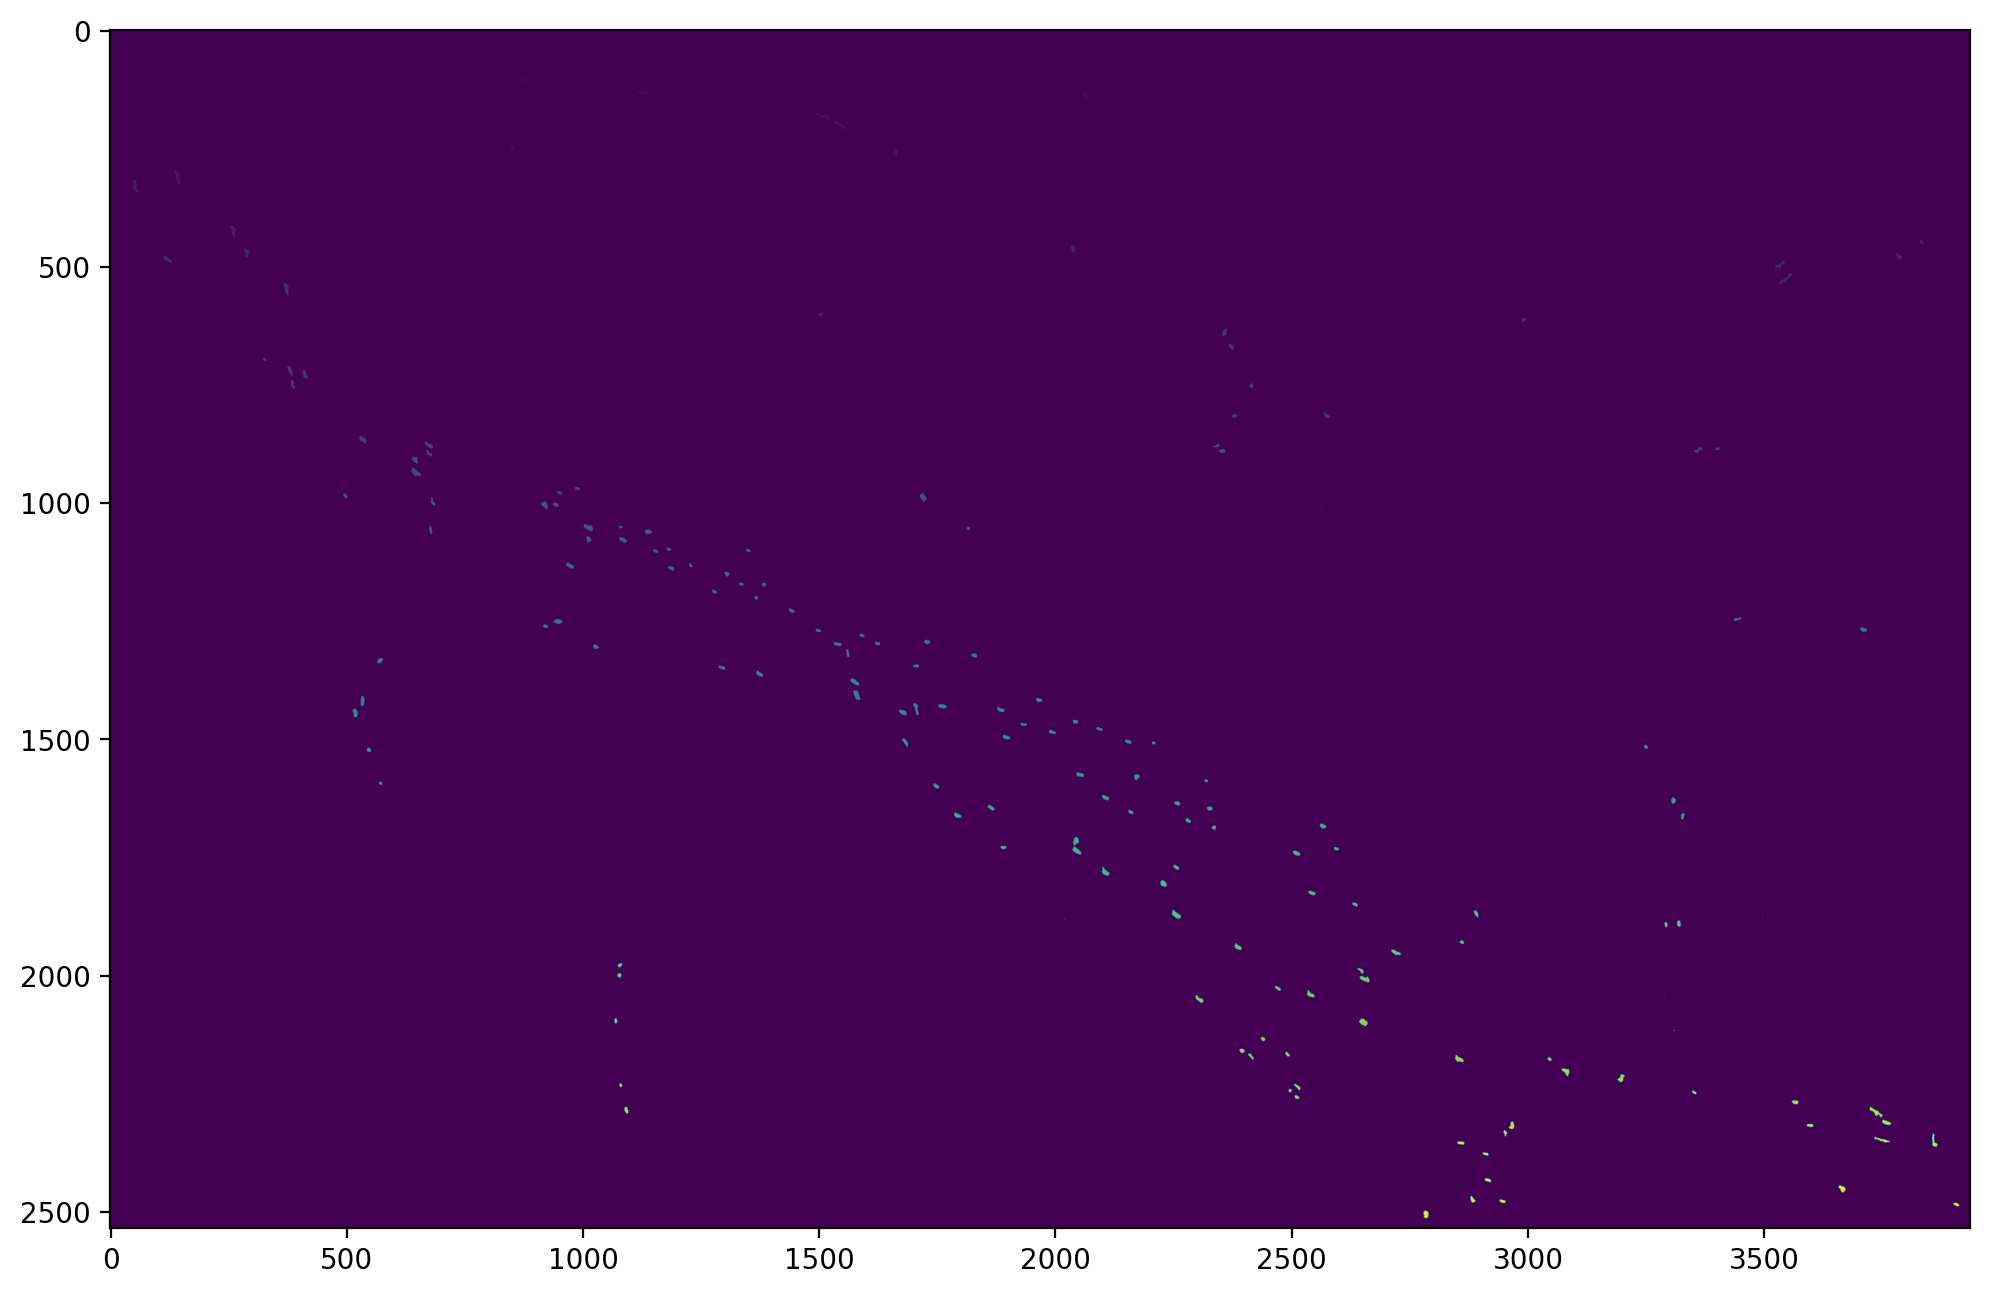

In [ ]:
plt.figure(figsize=(12,12), dpi=200)
plt.imshow(filtered_labels)

In [ ]:
filtered_regions

In [ ]:
area_list = []
for i in filtered_regions:
  area_list.append(i.area)

In [ ]:
np.mean(area_list)*100

8709.239130434782

In [ ]:
reg_2 = gdal.Open('/content/drive/MyDrive/GEOG371HW8/sar_20211109_vh_region2.tif')

In [ ]:
reg_2 = gdal.Open('/content/drive/MyDrive/GEOG371 Final Project/sar_20211109_vh_region2.tif')

In [ ]:
print(reg_2.GetGeoTransform())
print(reg_2.GetProjectionRef())

(428591.54698421515, 10.0, 0.0, 3462241.810604911, 0.0, -10.0)
PROJCS["WGS 84 / UTM zone 51N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32651"]]


In [ ]:
reg_2_arr = reg_2.ReadAsArray()

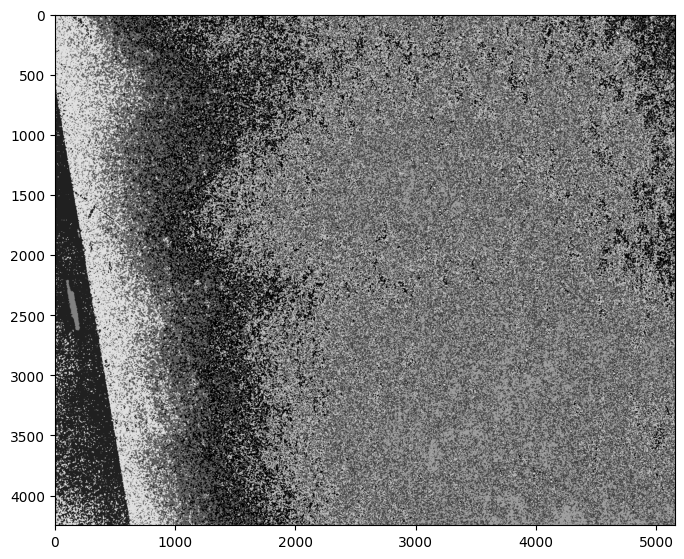

In [ ]:
# De-noises image using the denoise_tv_bregman function
r1_filtered = skimage.restoration.denoise_tv_bregman(reg_2_arr, weight=0.2)

# Reshapes the filtered array into a 2D array
X = r1_filtered.reshape((-1,1))
# Creates a clustering object with 9 clusters, 2000 max iterations, and a constant random seed
k_means = cluster.KMeans(n_clusters=9, max_iter=2000, random_state=0)
# Performs K-Means clustering
k_means.fit(X)

# Labels the clusters for 0 to 8 and reshapes the array to match the original dimensions
X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(reg_2_arr.shape)

# Plots the array
plt.figure(figsize=(8,8))
plt.imshow(X_cluster, cmap="grey")
plt.show()

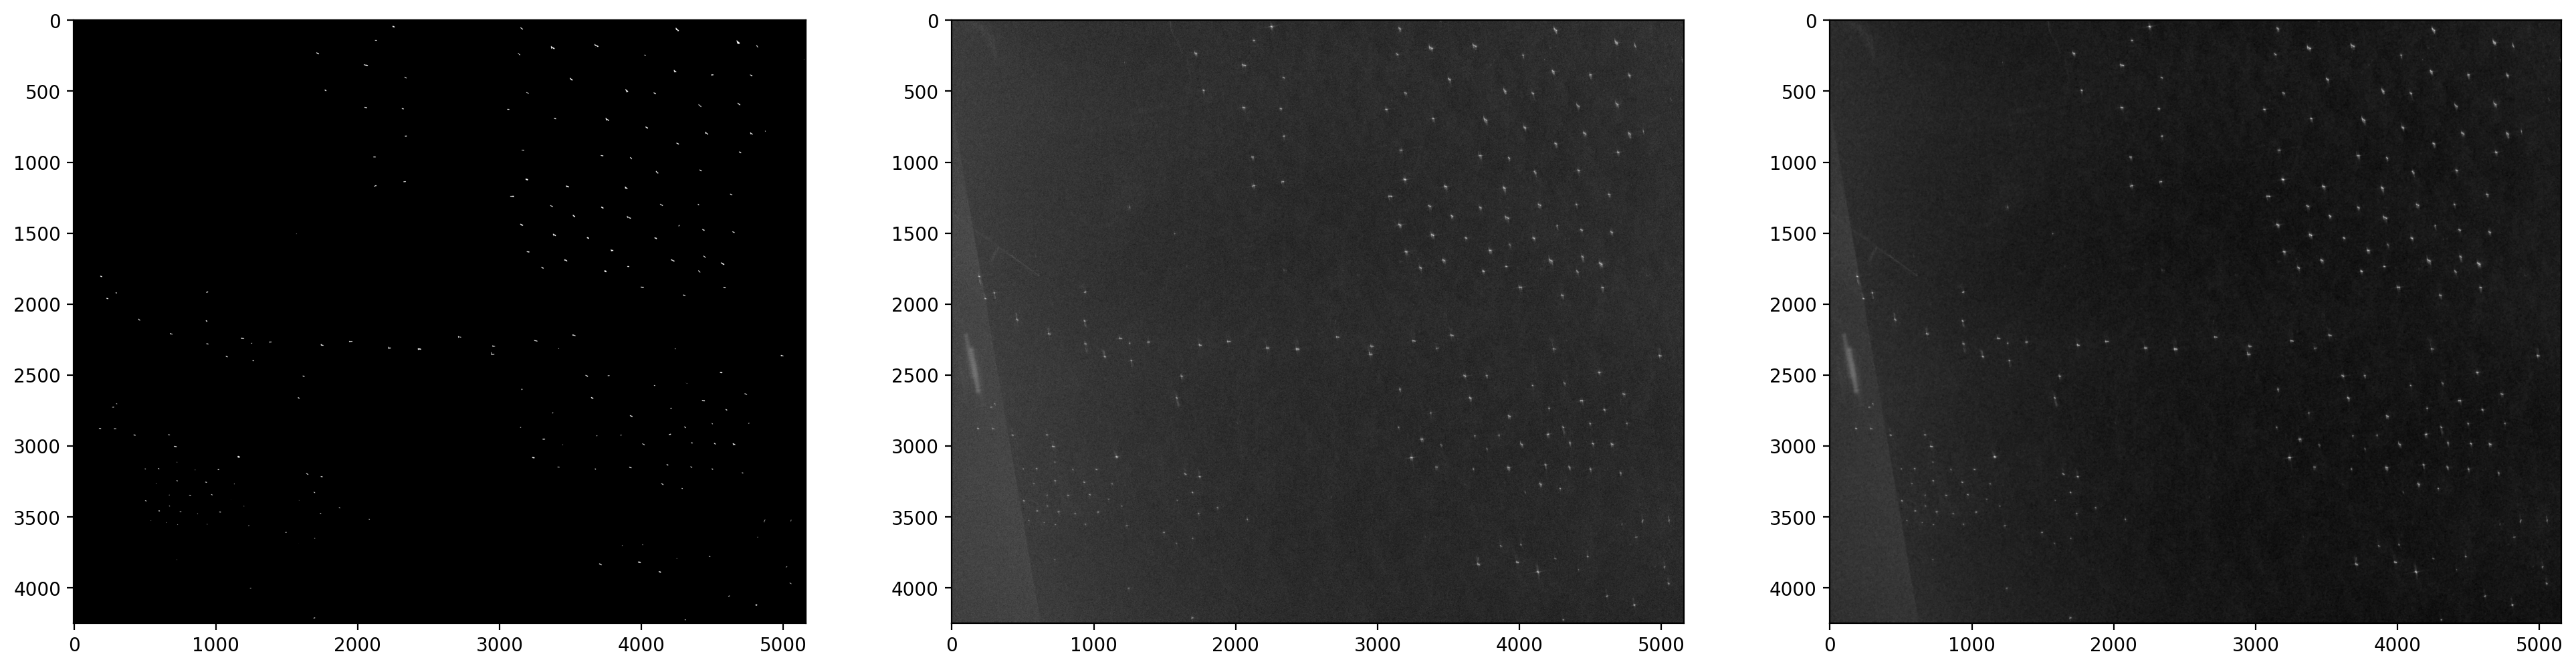

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 18), dpi=200)
axs[0].imshow(X_cluster == 8, cmap='gray')
axs[1].imshow(reg_2_arr, cmap='gray')
axs[2].imshow(r1_filtered, cmap='gray')

AttributeError: 'Axes' object has no attribute 'limit'

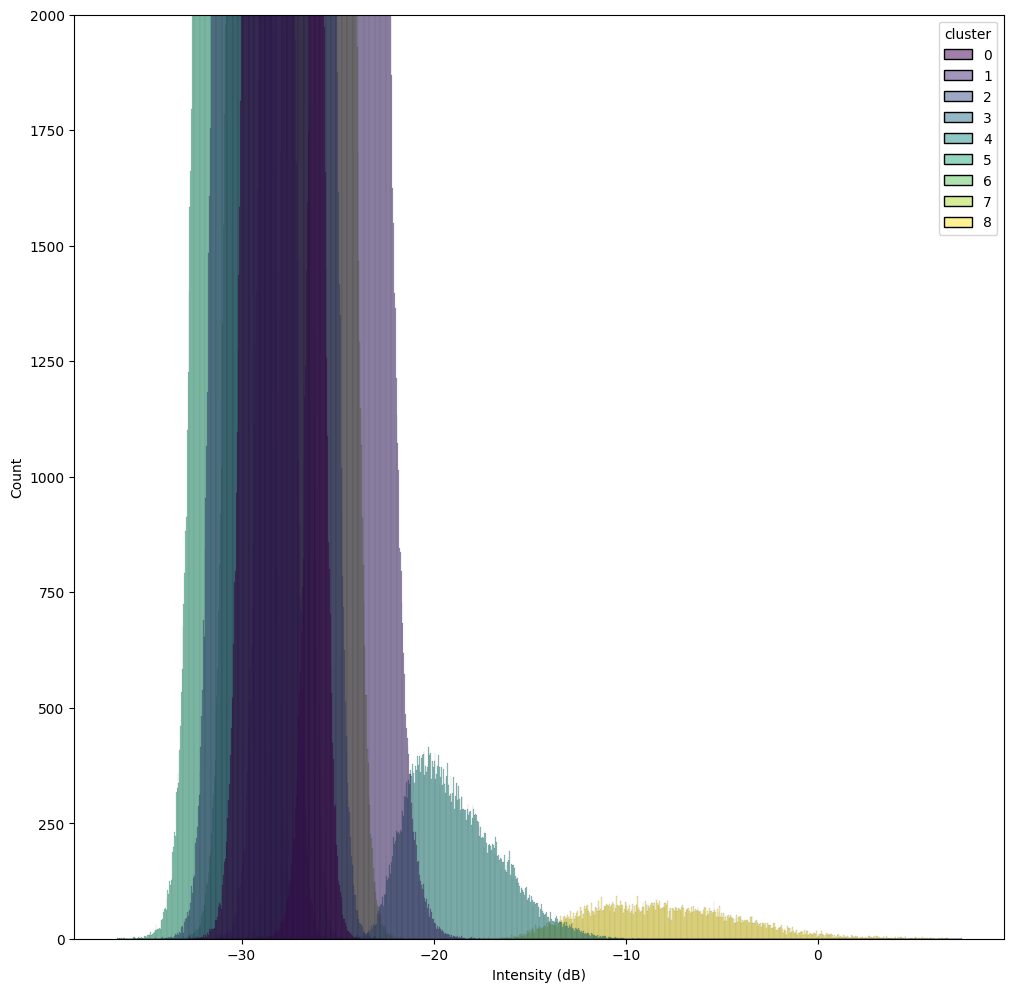

In [ ]:
cluster_hist_df = pd.DataFrame({'Intensity (dB)':reg_2_arr.flatten(), 'cluster':X_cluster.flatten()})
fig, ax = plt.subplots(figsize=(12,12))
ax.set_ylim(0,2000)
sns.histplot(cluster_hist_df, x='Intensity (dB)', hue='cluster', bins=1000, palette='viridis').limit(x=(-35, -5),y=(0,10000))

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 18), dpi=200)
axs[0].imshow(X_cluster == 4, cmap='gray')
axs[1].imshow(reg_2_arr, cmap='gray')
axs[2].imshow(r1_filtered, cmap='gray')

AttributeError: 'Axes' object has no attribute 'limit'

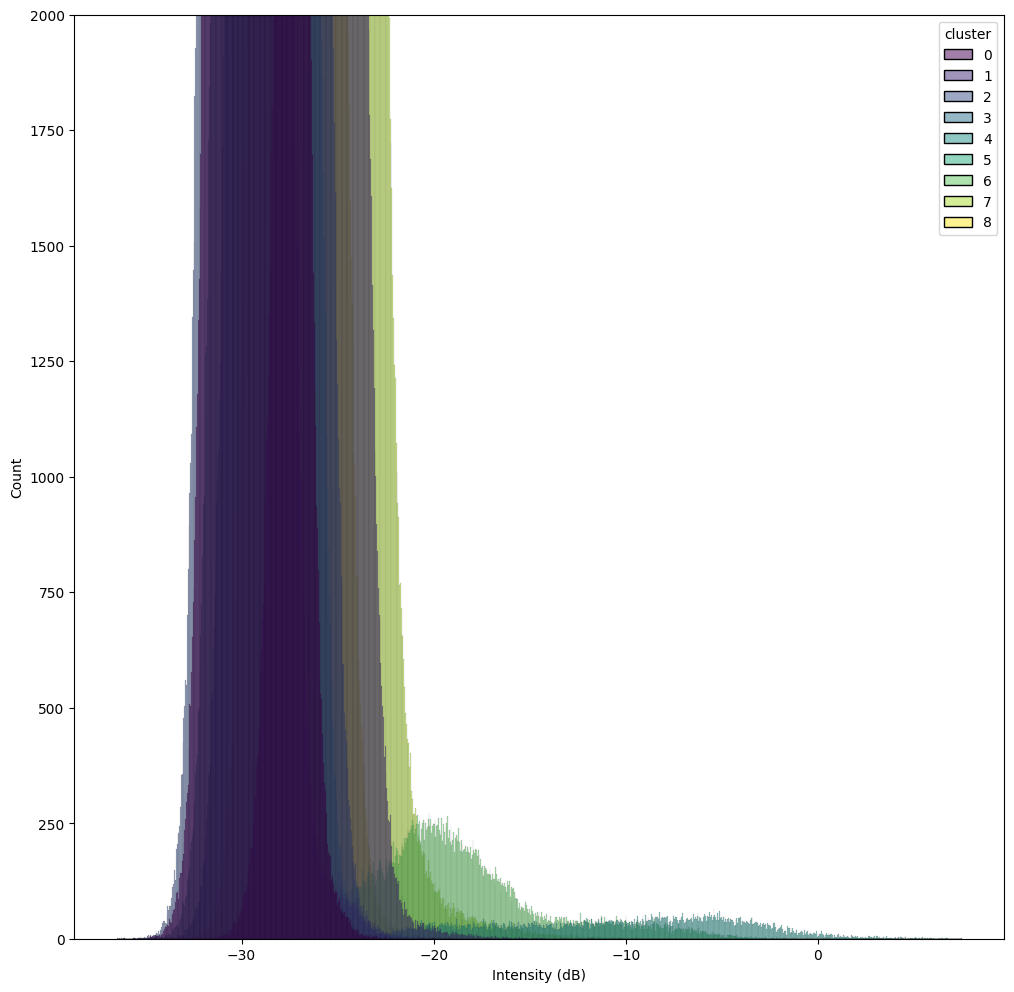

In [ ]:
cluster_hist_df = pd.DataFrame({'Intensity (dB)':reg_2_arr.flatten(), 'cluster':X_cluster.flatten()})
fig, ax = plt.subplots(figsize=(12,12))
ax.set_ylim(0,2000)
sns.histplot(cluster_hist_df, x='Intensity (dB)', hue='cluster', bins=1000, palette='viridis').limit(x=(-35, -5),y=(0,10000))

AttributeError: 'Axes' object has no attribute 'limit'

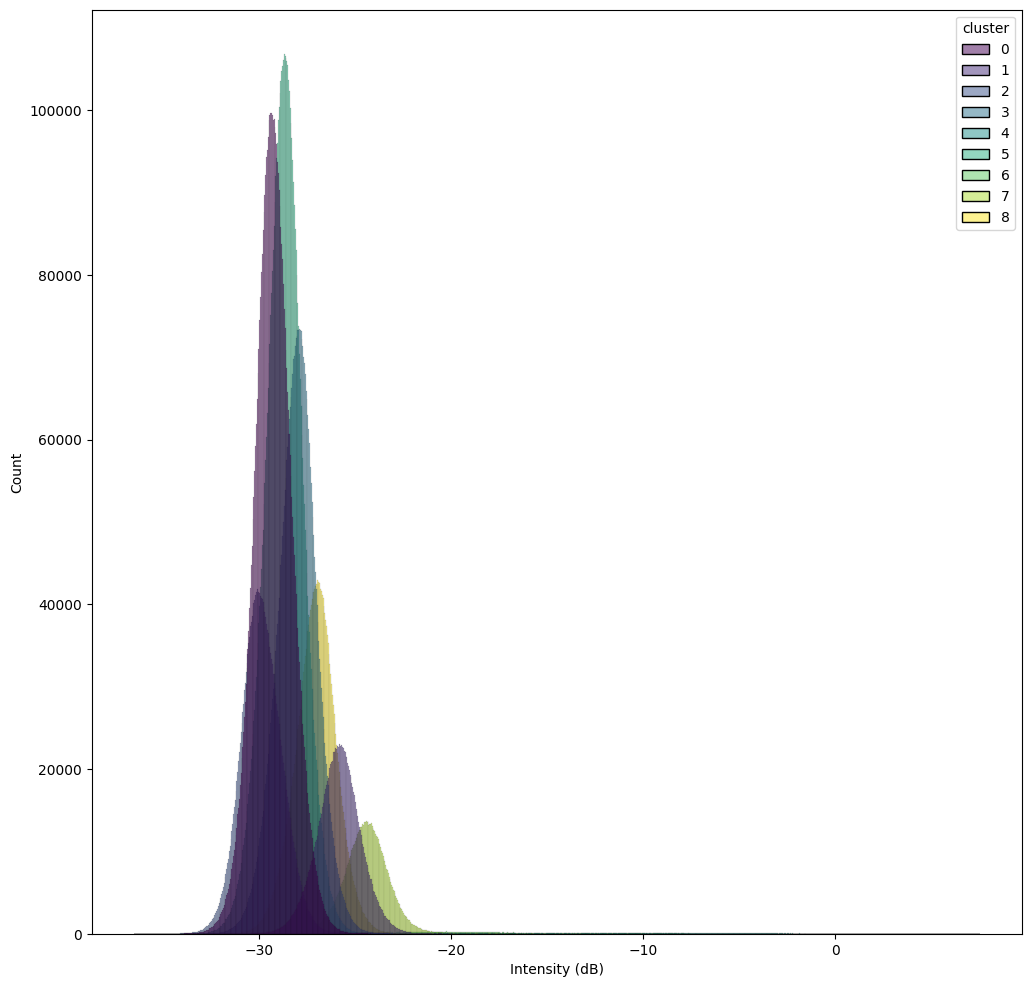

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.histplot(cluster_hist_df, x='Intensity (dB)', hue='cluster', bins=1000, palette='viridis').limit(x=(-35, -5),y=(0,10000))

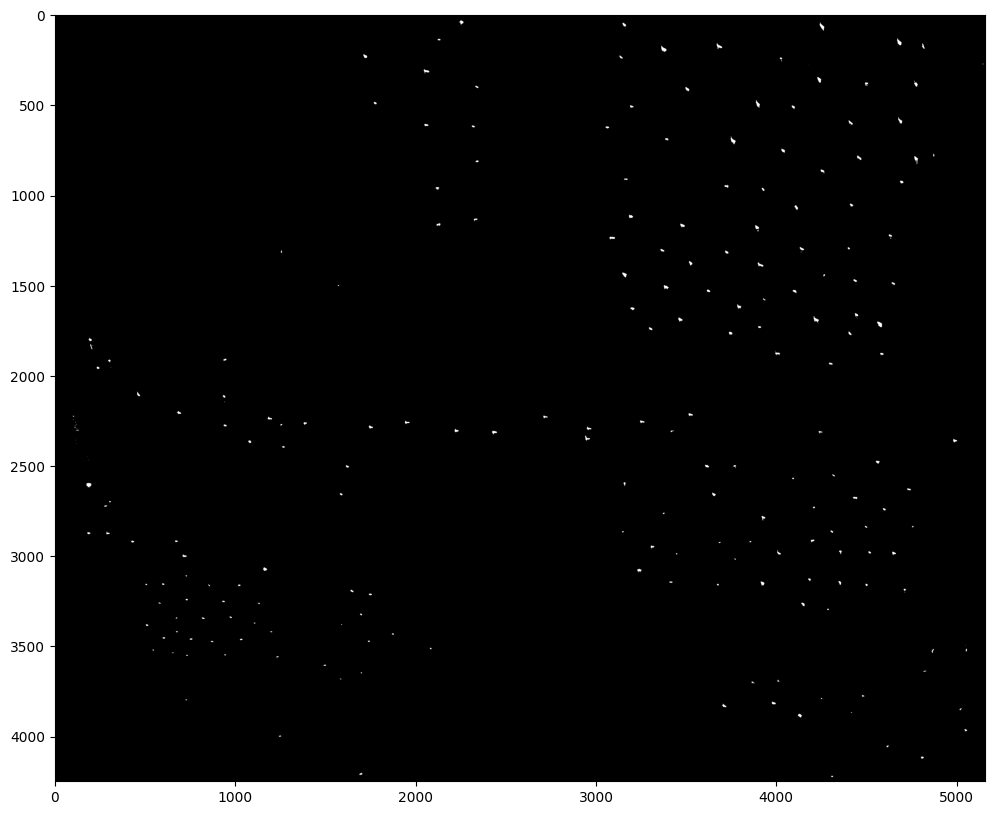

In [ ]:
r2_binary = (X_cluster == 4)

small_reg_rem = skimage.morphology.remove_small_objects(r2_binary, min_size=1000, connectivity=20)
large_reg_rem = np.where(small_reg_rem == 1, 0, r2_binary)

r2_binary_label = skimage.measure.label(large_reg_rem)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(large_reg_rem, cmap='gray')

In [ ]:
ocean_labels = skimage.measure.label(X_cluster == 8)

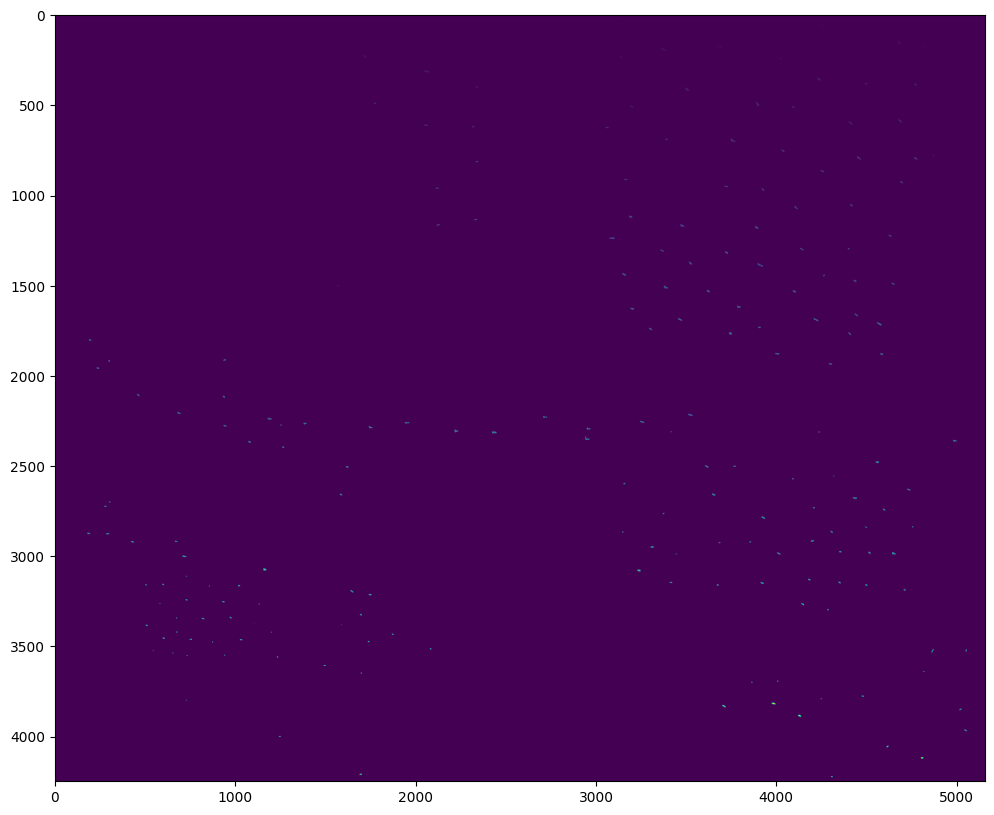

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(ocean_labels)

In [ ]:
ocean_props = skimage.measure.regionprops(ocean_labels)

In [ ]:
area_list = []
for i in ocean_props:
  area_list.append(i.area)

In [ ]:
len(area_list)

207

In [ ]:
np.mean(area_list)*100

8199.51690821256